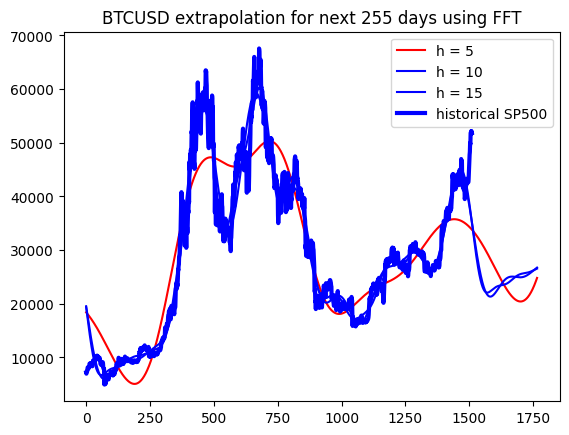

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
from numpy import fft
import pylab as pl
n_predict = 255
for ticker in ["BTC-USD"]:
    x = yf.download(ticker, start="2020-01-01", progress=False, interval="1d")['Close']
    n = x.size
    n_harm = 40
    t = np.arange(0, n)        
    p = np.polyfit(t, x, deg=1)        

    x_notrend = x - p[0] * t        
    x_freqdom = fft.fft(x_notrend) 
    f = fft.fftfreq(n) 

    indexes = list(range(n))
    indexes.sort(key = lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    iters = [5, 10, 15]
    for n_harm in iters:
        restored_sig = np.zeros(t.size)
        for i in indexes[:1 + n_harm * 2]:
            ampli = np.absolute(x_freqdom[i]) / n   # amplitude
            phase = np.angle(x_freqdom[i])          # phase
            restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
        extrapolation = restored_sig + p[0] * t
        color = "r" if n_harm == iters[0] else "b"
        if n_harm == 9:
            color = "purple"
        pl.plot(np.arange(0, extrapolation.size), extrapolation, color, label = f'h = {n_harm}')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'historical SP500', linewidth = 3)
    pl.title(f"BTCUSD extrapolation for next 255 days using FFT")
    pl.legend()
    pl.show()

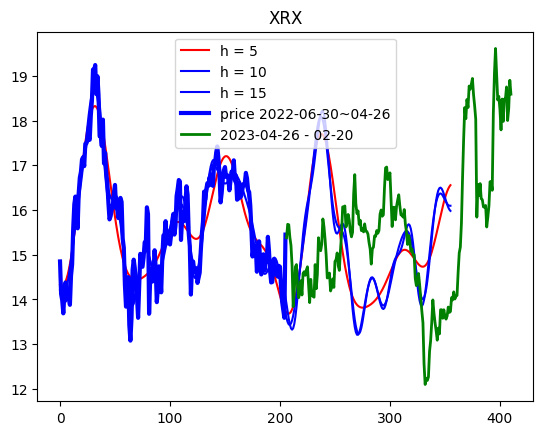

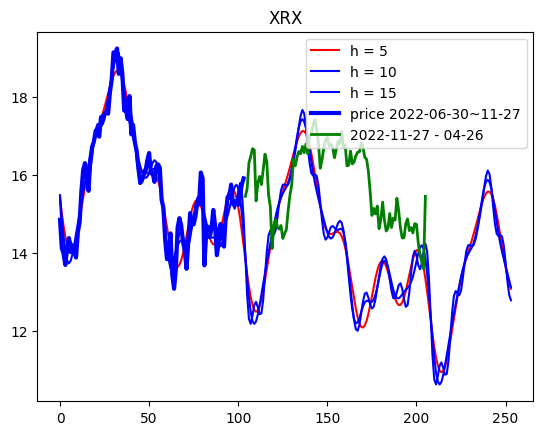

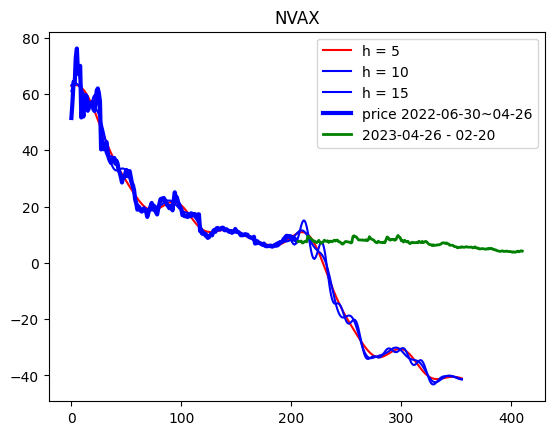

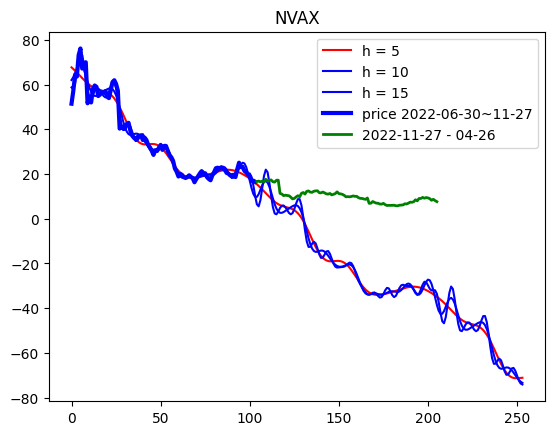

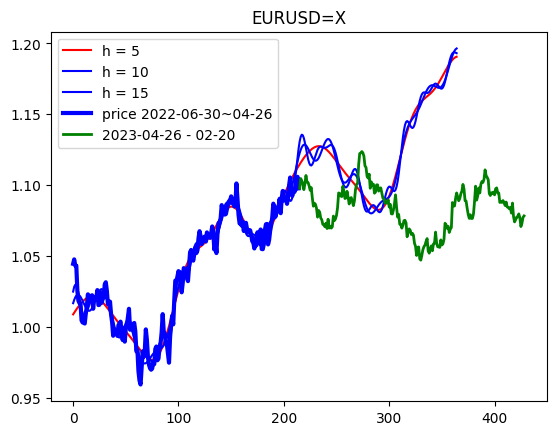

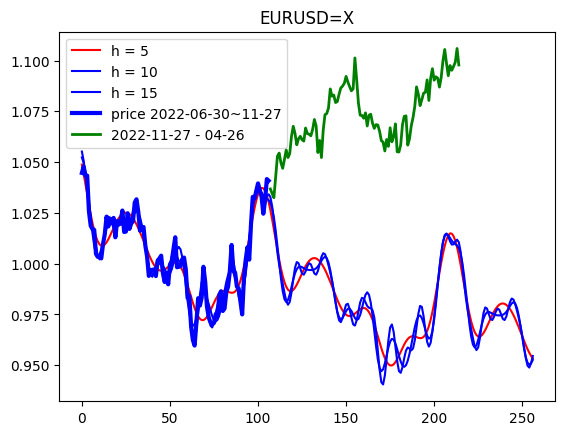

TypeError: expected x and y to have same length

In [14]:
# version 1
n_predict = 150
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
from numpy import fft
import pylab as pl
ticker = "AAPL"
uptrend_1 = []
downtrend_1 = []
uptrend_2 = []
downtrend_2 = []
uptrend_3 = []
downtrend_3 = []
"""
測試數據: 從a = 300 天前開始
測試數據數量: b = 150 => past 300 days ~ past 150 days
預測數據{
    想法1: 只預測未來1m
    想法2: 測試數據:預測數據 = 1:1
    想法3: 
}
"""
tickers = ["XRX", "NFLX", "SHOP", "PANL", "OGN", "NVGS", "KMPR", "IBKR", "FFIV", "FFIN", "EDRY", "CX", "CE"]
for ticker in ["XRX", "NVAX", "EURUSD=X"]:
    # start = '2023-05-01'
    a = 600
    for b in [300, 150]:
        # b = a/2
        start = datetime.datetime.now() - datetime.timedelta(days=a)
        # end = '2023-10-01'
        end = start + datetime.timedelta(days=b)
        end_1 = end + datetime.timedelta(days=b)#start + datetime.timedelta(days=a-a/4)
        x = yf.download(ticker, start=start, end=end, progress=False, interval="1d")['Close']
        test = yf.download(ticker, start = end, end = end_1, progress=False)['Close']
        result_trend = np.polyfit(np.arange(0, test.size), test, deg=1)[0]
        n = x.size
        n_harm = 40
        t = np.arange(0, n)        
        p = np.polyfit(t, x, deg=1)        

        x_notrend = x - p[0] * t        
        x_freqdom = fft.fft(x_notrend) 
        f = fft.fftfreq(n) 

        indexes = list(range(n))
        indexes.sort(key = lambda i: np.absolute(f[i]))

        t = np.arange(0, n + n_predict)
        iters = [5, 10, 15]
        for n_harm in iters:
            restored_sig = np.zeros(t.size)
            for i in indexes[:1 + n_harm * 2]:
                ampli = np.absolute(x_freqdom[i]) / n   # amplitude
                phase = np.angle(x_freqdom[i])          # phase
                restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
            extrapolation = restored_sig + p[0] * t
            color = "r" if n_harm == iters[0] else "b"
            if n_harm == 9:
                color = "purple"
            pl.plot(np.arange(0, extrapolation.size), extrapolation, color, label = f'h = {n_harm}')
        pl.plot(np.arange(0, x.size), x, 'b', label = f'price {start.strftime("%Y-%m-%d")}~{end.strftime("%m-%d")}', linewidth = 3)
        pl.plot(np.arange(x.size, x.size+test.size), test, 'g', label = f'{end.strftime("%Y-%m-%d")} - {end_1.strftime("%m-%d")} ', linewidth = 2)
        # pl.plot(np.arange(0, x.size), x_notrend, "y", label="x_notrend", linewidth = 3)
        pl.title(f"{ticker}")
        pl.legend()
        pl.show()
        last_close = x.iloc[-1]
        diffs = list(extrapolation[x.size:] - last_close)
        max_diff = max(diffs)
        min_diff = min(diffs)

        check_extrapolation_trend = np.polyfit(np.arange(0, len(test)), extrapolation[-(n_predict+test.size):-n_predict], deg=1)[0]
        if a == "600":
            if max_diff > abs(min_diff):
                uptrend_1.append(ticker)
            elif max_diff < abs(min_diff):
                downtrend_1.append(ticker)
            if result_trend > 0:
                uptrend_2.append(ticker)
            elif result_trend < 0:
                downtrend_2.append(ticker)

            if check_extrapolation_trend > 0:
                uptrend_3.append(ticker)
            elif check_extrapolation_trend < 0:
                downtrend_3.append(ticker)
print("uptrend for max_min validation:", uptrend_1)
print("downtrend for max_min validation:", downtrend_1)
print("uptrend for linear regression validation: ", uptrend_3)
print("downtrend for linear regression validation: ", downtrend_3)
print("Stock with really uptrend: ", uptrend_2)
print("Stock with really downtrend: ", downtrend_2)

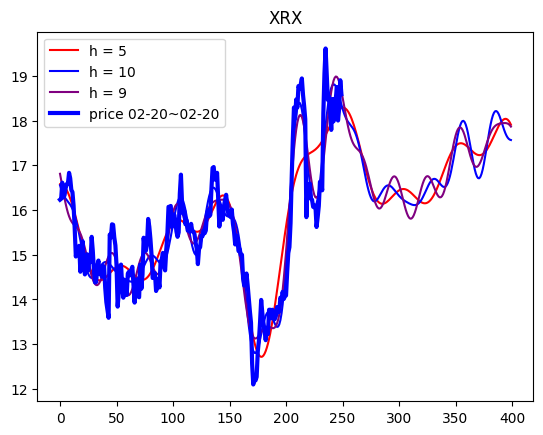

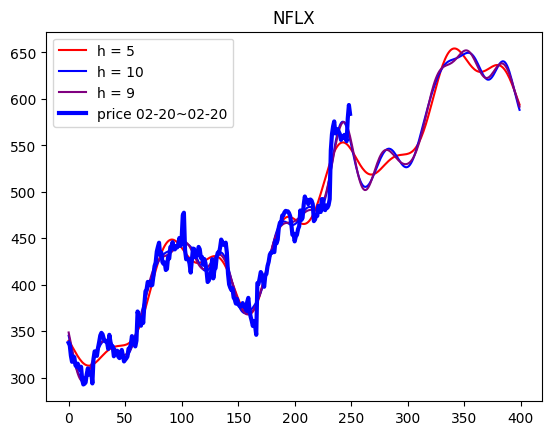

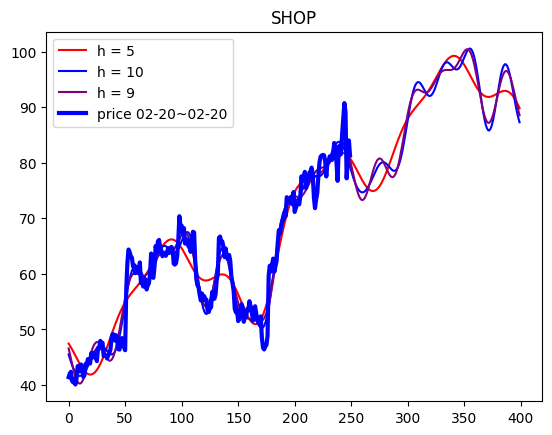

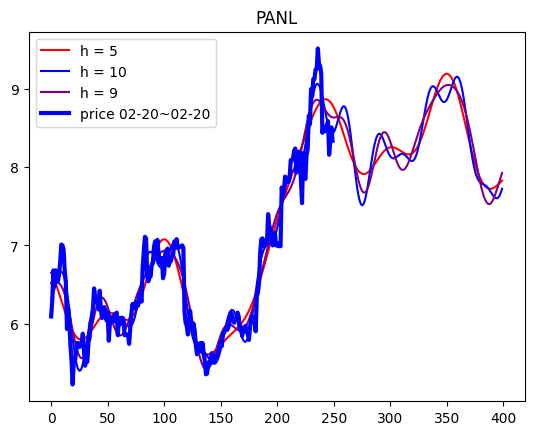

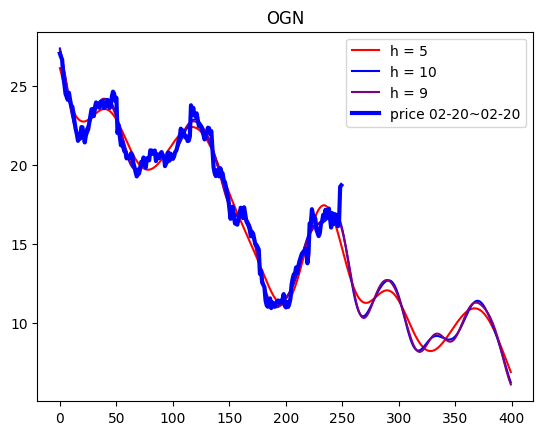

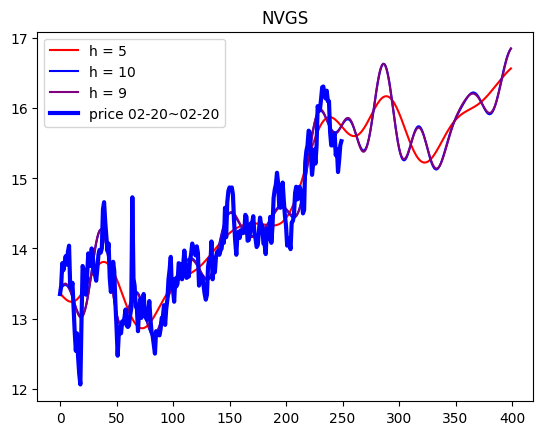

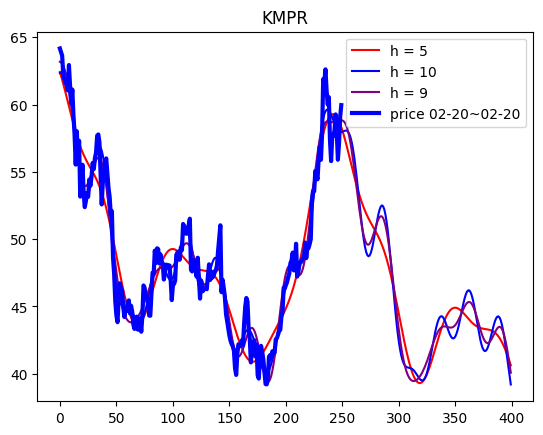

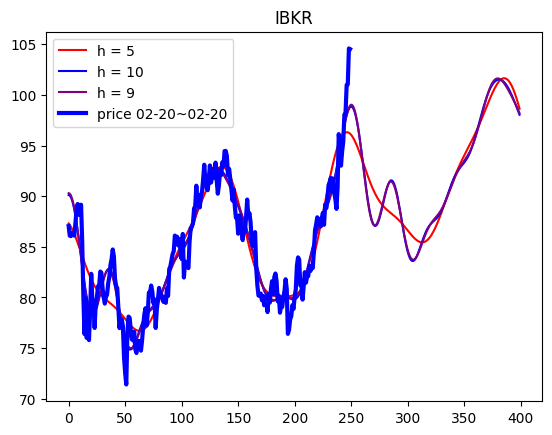

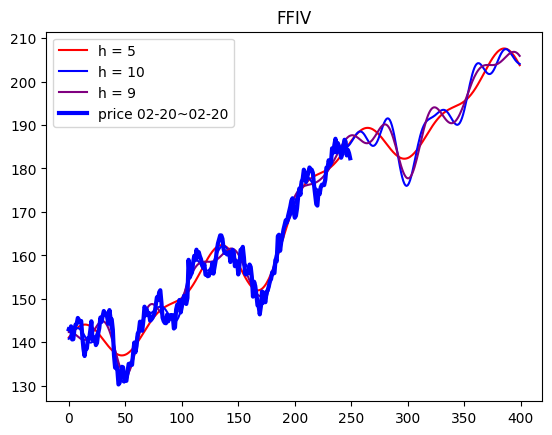

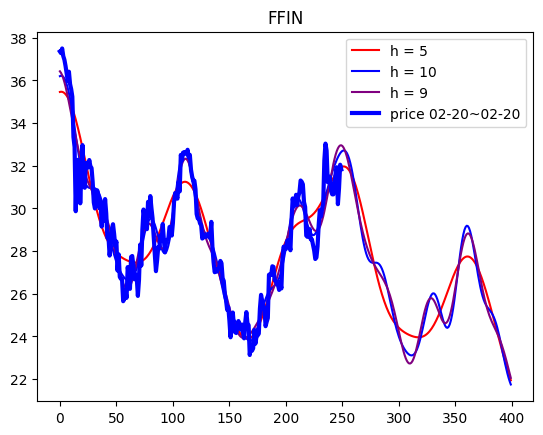

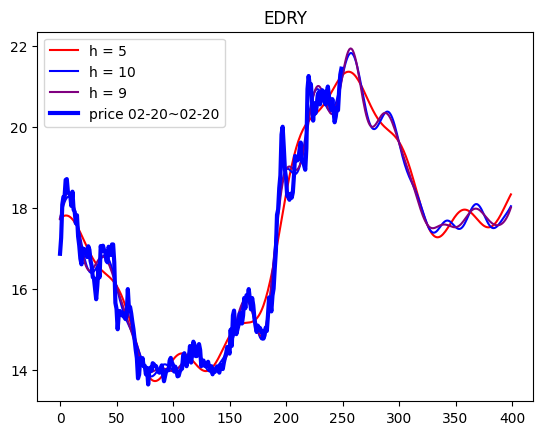

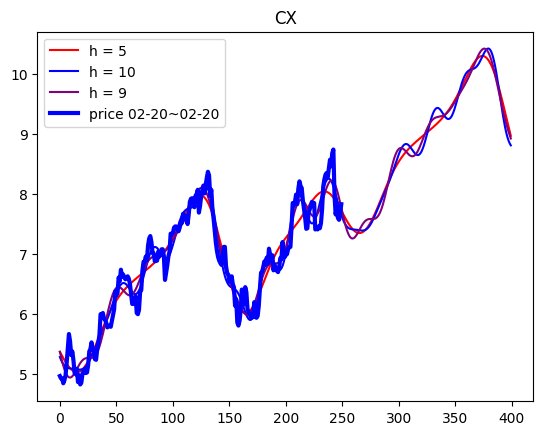

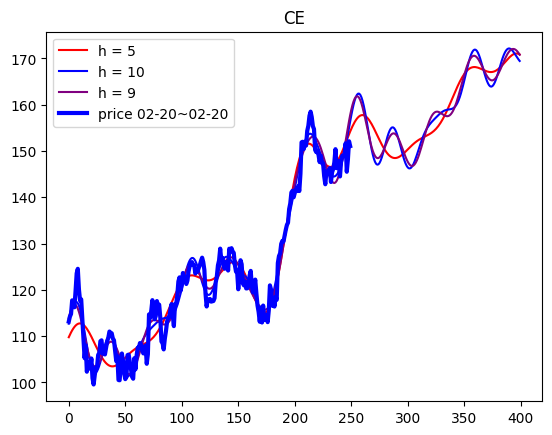

uptrend for max_min validation: ['SHOP', 'NVGS', 'FFIV', 'CX', 'CE']
downtrend for max_min validation: ['XRX', 'NFLX', 'PANL', 'OGN', 'KMPR', 'IBKR', 'FFIN', 'EDRY']


In [8]:
# version 1
n_predict = 150
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
from numpy import fft
import pylab as pl
ticker = "AAPL"
uptrend_1 = []
downtrend_1 = []
uptrend_2 = []
downtrend_2 = []
uptrend_3 = []
downtrend_3 = []
for ticker in ["XRX", "NFLX", "SHOP", "PANL", "OGN", "NVGS", "KMPR", "IBKR", "FFIV", "FFIN", "EDRY", "CX", "CE"]:
    # start = '2023-05-01'
    a = 365
    start = datetime.datetime.now() - datetime.timedelta(days=a)
    # end = '2023-10-01'
    end = start + datetime.timedelta(days=a)
    x = yf.download(ticker, start=start, end=end, progress=False, interval="1d")['Close']
    n = x.size
    n_harm = 10  
    t = np.arange(0, n)        
    p = np.polyfit(t, x, deg=1)        

    x_notrend = x - p[0] * t        
    x_freqdom = fft.fft(x_notrend) 
    f = fft.fftfreq(n) 

    indexes = list(range(n))
    indexes.sort(key = lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    iters = [5, 10, 9]
    for n_harm in iters:
        restored_sig = np.zeros(t.size)
        for i in indexes[:1 + n_harm * 2]:
            ampli = np.absolute(x_freqdom[i]) / n   # amplitude
            phase = np.angle(x_freqdom[i])          # phase
            restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
        extrapolation = restored_sig + p[0] * t
        color = "r" if n_harm == iters[0] else "b"
        if n_harm == 9:
            color = "purple"
        pl.plot(np.arange(0, extrapolation.size), extrapolation, color, label = f'h = {n_harm}')
    pl.plot(np.arange(0, x.size), x, 'b', label = f'price {start.strftime("%m-%d")}~{end.strftime("%m-%d")}', linewidth = 3)
    pl.title(f"{ticker}")
    pl.legend()
    pl.show()
    last_close = x.iloc[-1]
    diffs = list(extrapolation[x.size:] - last_close)
    max_diff = max(diffs)
    min_diff = min(diffs)

    if max_diff > abs(min_diff):
        uptrend_1.append(ticker)
    elif max_diff < abs(min_diff):
        downtrend_1.append(ticker)
print("uptrend for max_min validation:", uptrend_1)
print("downtrend for max_min validation:", downtrend_1)